# Analysing the Ted talk data
Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Since the time we have begun watching TED Talks, they have never ceased to amaze us. We have learned an incredible amount, about fields we were completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor. So in this notebook, we are attempting at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions.

### Features Available
* name: The official name of the TED Talk. Includes the title and the speaker.
* title: The title of the talk
* description: A blurb of what the talk is about.
* main_speaker: The first named speaker of the talk.
* speaker_occupation: The occupation of the main speaker.
* num_speaker: The number of speakers in the talk.
* duration: The duration of the talk in seconds.
* event: The TED/TEDx event where the talk took place.
* film_date: The Unix timestamp of the filming.
* published_date: The Unix timestamp for the publication of the talk on TED.com
* comments: The number of first level comments made on the talk.
* tags: The themes associated with the talk.
* languages: The number of languages in which the talk is available.
* ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* related_talks: A list of dictionaries of recommended talks to watch next.
* url: The URL of the talk.
* views: The number of views on the talk.

## Loading and reading the data

In [61]:
import os
from os.path import dirname, abspath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import datetime
%matplotlib inline

In [62]:
root_dir = abspath('.')
root_dir

'C:\\Users\\EMKAY\\Desktop\\Greyatom\\CODEALONGS\\TED Data analysis'

In [63]:
os.listdir(root_dir)

['.ipynb_checkpoints',
 'GreyAtom - Code Along Saturday_TED Data Analysis_11th July 2020 on Vimeo.html',
 'GreyAtom - Code Along Saturday_TED Data Analysis_11th July 2020 on Vimeo_files',
 'TED Analysis.ipynb',
 'ted.csv']

In [64]:
ted_file = os.path.join(root_dir, 'ted.csv')
ted_file

'C:\\Users\\EMKAY\\Desktop\\Greyatom\\CODEALONGS\\TED Data analysis\\ted.csv'

In [65]:
ted = pd.read_csv(ted_file)
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [66]:
ted.shape

(2550, 17)

In [67]:
#checking for null values
ted.isnull().sum()

name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

In [68]:
ted[ted['speaker_occupation'].isnull()]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
1113,Sonaar Luthra: Meet the Water Canary,Meet the Water Canary,"After a crisis, how can we tell if water is sa...",Sonaar Luthra,NaN,1,217,TEDGlobal 2011,14-07-2011,16-01-2012,145,"['TED Fellows', 'design', 'global development'...",38,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,Rick Falkvinge: I am a pirate,I am a pirate,"The Pirate Party fights for transparency, anon...",Rick Falkvinge,NaN,1,1097,TEDxObserver,11-03-2012,01-04-2012,122,"['Internet', 'TEDx', 'global issues', 'politic...",10,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,Gary Kovacs: Tracking our online trackers,Tracking our online trackers,"As you surf the Web, information is being coll...",Gary Kovacs,NaN,1,399,TED2012,29-02-2012,03-05-2012,257,"['Internet', 'advertising', 'business', 'priva...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,Ryan Holladay: To hear this music you have to ...,To hear this music you have to be there. Liter...,"In this lovely talk, TED Fellow Ryan Holladay ...",Ryan Holladay,NaN,1,389,TED@BCG San Francisco,30-10-2013,10-01-2014,140,"['TED Fellows', 'entertainment', 'music', 'tec...",33,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,Brian Dettmer: Old books reborn as art,Old books reborn as art,What do you do with an outdated encyclopedia i...,Brian Dettmer,NaN,1,366,TEDYouth 2014,04-11-2014,06-02-2015,48,"['TEDYouth', 'art', 'books', 'creativity']",34,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,Boniface Mwangi: The day I stood up alone,The day I stood up alone,Photographer Boniface Mwangi wanted to protest...,Boniface Mwangi,NaN,1,440,TEDGlobal 2014,20-10-2014,02-04-2015,70,"['TED Fellows', 'activism', 'art', 'corruption...",33,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/boniface_mwangi_boni...,1342431


## What are the top 15 most viewed talks of all time?

In [69]:
ted.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

In [70]:
top_15 = ted[['title','views']].sort_values('views', ascending=False).iloc[:15,:]

In [71]:
top_15

,title,views
0,Do schools kill creativity?,47227110
1346,Your body language may shape who you are,43155405
677,How great leaders inspire action,34309432
837,The power of vulnerability,31168150
452,10 things you didn't know about orgasm,22270883
1776,How to speak so that people want to listen,21594632
201,My stroke of insight,21190883
5,Why we do what we do,20685401
2114,This is what happens when you reply to spam email,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",19787465


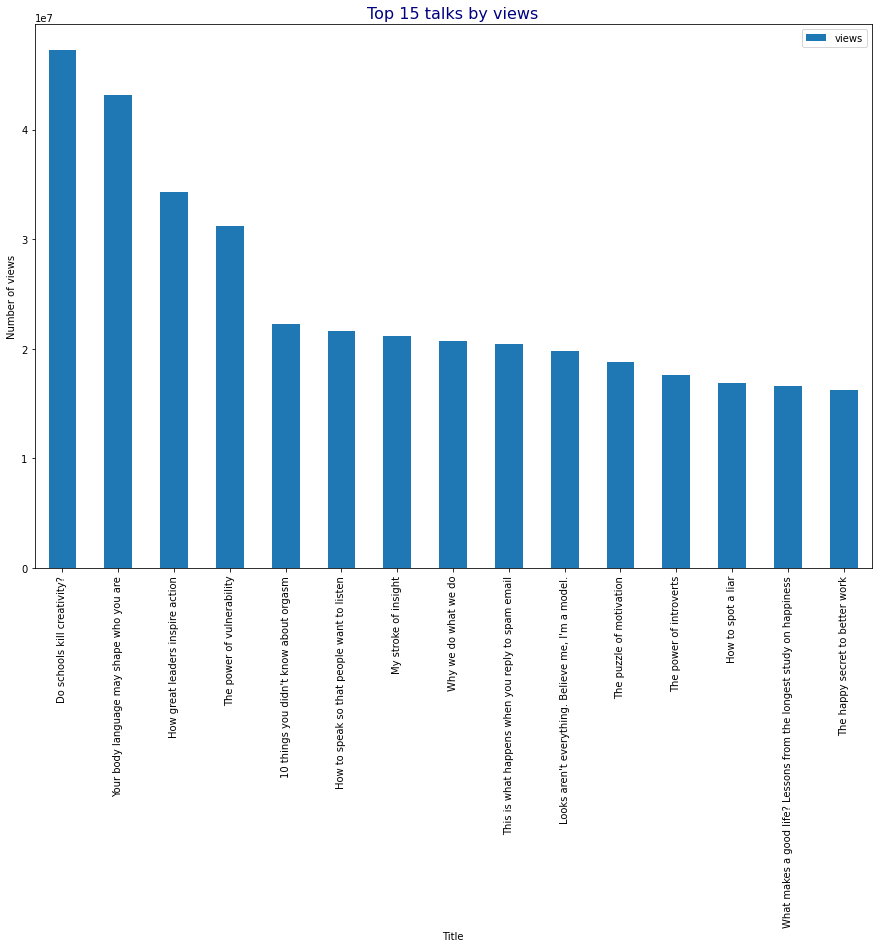

In [72]:
top_15.set_index('title').plot(kind = 'bar', figsize=(15,10))
plt.title('Top 15 talks by views', fontsize = 16, color = 'navy')
plt.xlabel('Title')
plt.ylabel('Number of views')
plt.show()

# Find out the distribution and summary statistics of views and comments

In [73]:
ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [74]:
#Creating a column containing views converted into millions
ted['views_mn'] = ted['views'].map(lambda x: x/1000000)

In [75]:
ted['views_mn'].describe()

count    2550.000000
mean        1.698297
std         2.498479
min         0.050443
25%         0.755793
50%         1.124524
75%         1.700759
max        47.227110
Name: views_mn, dtype: float64

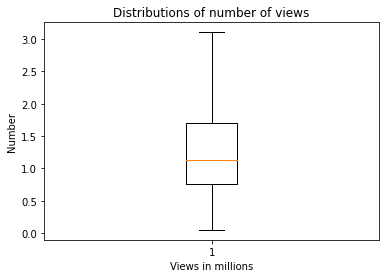

In [76]:
#Boxplot for seeing Views distribution
plt.boxplot(ted['views_mn'], showfliers=False)
plt.title('Distributions of number of views')
plt.xlabel('Views in millions')
plt.ylabel('Number')
plt.show()

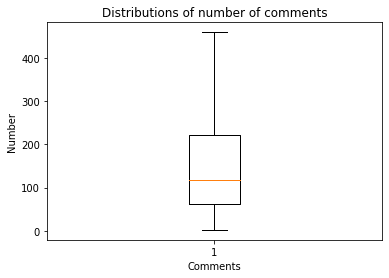

In [77]:
#Boxplot for seeing comments distribution
plt.boxplot(ted['comments'], showfliers=False)
plt.title('Distributions of number of comments')
plt.xlabel('Comments')
plt.ylabel('Number')
plt.show()

# Is there any correlation between views and comments?

In [78]:
#Correlation between views and comments
ted[['views_mn', 'comments']].corr().round(4)

,views_mn,comments
views_mn,1.0000,0.5309
comments,0.5309,1.0000


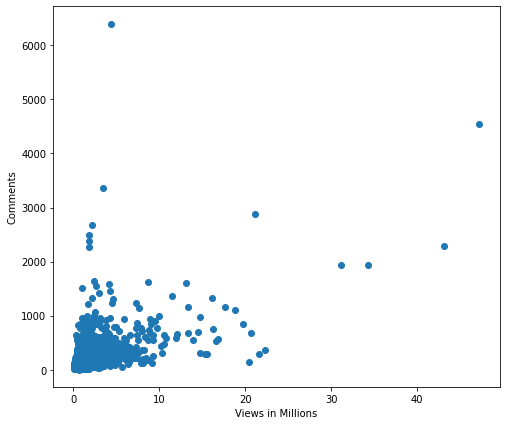

In [79]:
plt.figure(figsize = (8,7))
plt.scatter(x = ted['views_mn'], y=ted['comments'])
plt.xlabel('Views in Millions')
plt.ylabel('Comments')
plt.show()

In [80]:
#Dataset with no outliers
ted_no_outliers = ted[(ted['views_mn'] < 3.3) & (ted['comments'] < 500)]

In [81]:
#Correlation when outliers are removed
ted_no_outliers[['views_mn', 'comments']].corr().round(4)

,views_mn,comments
views_mn,1.0000,0.3706
comments,0.3706,1.0000


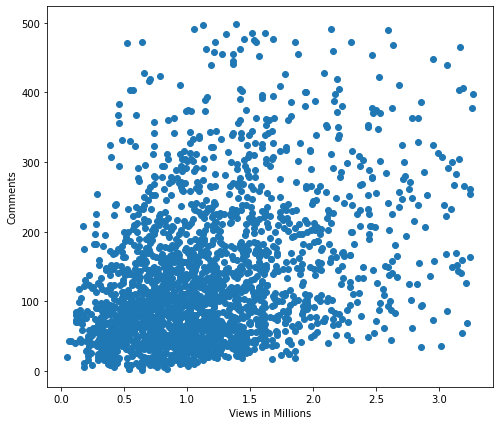

In [82]:
#Scatterplot  between views and comments when outliers are removed
plt.figure(figsize = (8,7))
plt.scatter(x = ted_no_outliers['views_mn'], y=ted_no_outliers['comments'])
plt.xlabel('Views in Millions')
plt.ylabel('Comments')
plt.show()

###### When we got rid of the outliers, the correlation decreased drastically. Which means there is very less correlation between the points and it is only the outliers that were pulling it up

## Let us now check the number of views and comments on the 10 most commented TED Talks of all time. What are your observations?

In [83]:
#Finding the top 10 commented talks in the dataset 
top_10_commented = ted[['views_mn', 'comments']].sort_values(by = ['comments', 'views_mn'], ascending=[False, False])[:10]

In [84]:
#Finding the correlation 
top_10_commented.corr()

,views_mn,comments
views_mn,1.00000,-0.01875
comments,-0.01875,1.00000


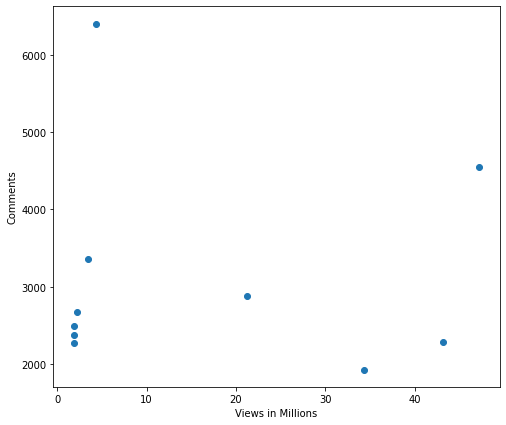

In [85]:
#Scatterplot for the top 10 commented talks in the dataset
plt.figure(figsize = (8,7))
plt.scatter(x = top_10_commented['views_mn'], y=top_10_commented['comments'])
plt.xlabel('Views in Millions')
plt.ylabel('Comments')
plt.show()

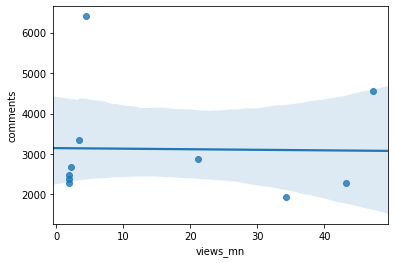

In [86]:
sns.regplot(x = top_10_commented['views_mn'], y=top_10_commented['comments'])

## Which talks tend to attract the largest amount of discussion as compared to the number of views?

##### To answer this question we will define a new feature 'discussion quotient' which is simply the ratio of number of comments to the number of views. We will then check which talks have the highest discussion quotient

In [87]:
ted['discussion_quotient'] = ted['comments']/ted['views_mn']

In [88]:
ted[['title', 'main_speaker', 'tags', 'views_mn', 'comments', 'discussion_quotient']].sort_values('discussion_quotient', ascending = False)

,title,main_speaker,tags,views_mn,comments,discussion_quotient
744,The case for same-sex marriage,Diane J. Savino,"['God', 'LGBT', 'culture', 'government', 'law'...",0.292395,649,2219.600198
803,E-voting without fraud,David Bismark,"['culture', 'democracy', 'design', 'global iss...",0.543551,834,1534.354642
96,Militant atheism,Richard Dawkins,"['God', 'atheism', 'culture', 'religion', 'sci...",4.374792,6404,1463.841024
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,"['TED Fellows', 'children', 'culture', 'film',...",1.057238,1502,1420.682949
954,Taking imagination seriously,Janet Echelman,"['art', 'cities', 'culture', 'data', 'design',...",1.832930,2492,1359.571833
...,...,...,...,...,...,...
2494,A simple new blood test that can catch cancer ...,Jimmy Lin,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",1.005506,7,6.961669
2528,How your pictures can help reclaim lost history,Chance Coughenour,"['TEDx', 'ancient world', 'archaeology', 'cons...",0.539207,3,5.563726
2542,Living sculptures that stand for history's truths,Sethembile Msezane,"['Africa', 'activism', 'art', 'community', 'hi...",0.542088,3,5.534157
2501,The stories behind The New Yorker's iconic covers,Françoise Mouly,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",0.839040,3,3.575515


## Who are the top speakers?

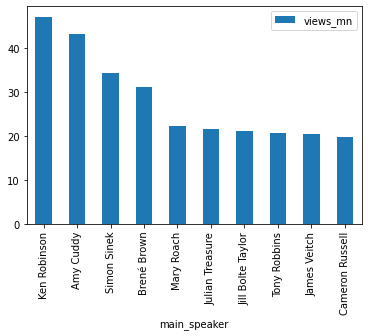

In [89]:
#Plot for Top 10 speakers wrt views
ted[['main_speaker', 'views_mn']].set_index('main_speaker').sort_values('views_mn', ascending = False)[:10].plot(kind = 'bar')

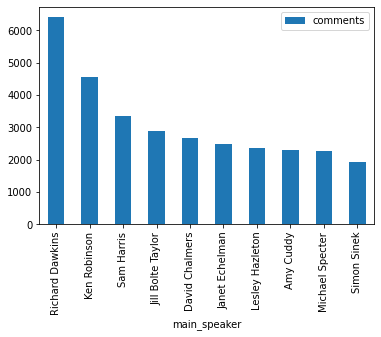

In [90]:
#Plot for top 10 speakers wrt number of comments
ted[['main_speaker', 'comments']].set_index('main_speaker').sort_values('comments', ascending = False)[:10].plot(kind = 'bar')

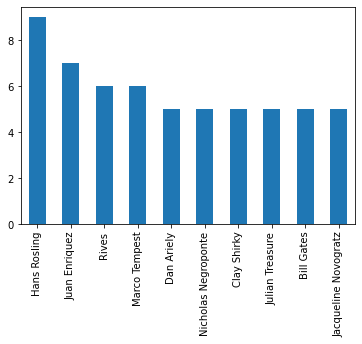

In [91]:
#Top 10 speakers depending on the number of talks given
ted['main_speaker'].value_counts()[:10].plot(kind = 'bar')

## Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events

In [92]:
#Finding the top 10 occupations that are highly preferred for choosing a TED Talk speaker
ted_top_occupation = ted['speaker_occupation'].value_counts()[:5]

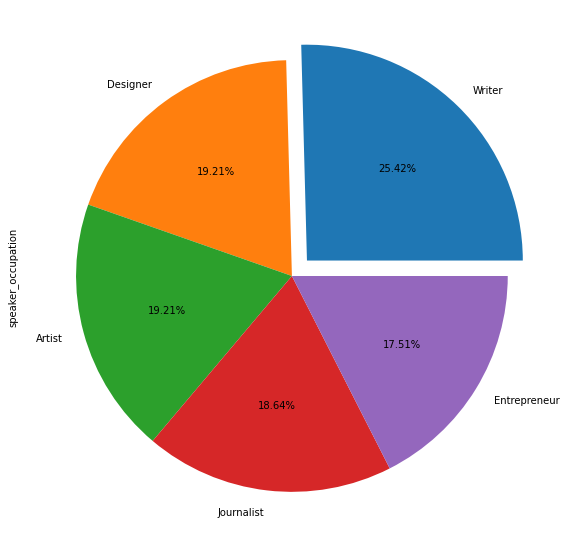

In [93]:
## Plotting a pie chart for the same
plt.figure(figsize = (8,8))
explode = (0.1, 0.0, 0.0, 0.0, 0.0)
ted_top_occupation.plot(kind = 'pie', explode = explode, autopct = '%1.2f%%')
plt.tight_layout()

## Do some professions tend to attract a larger number of viewers?

In [94]:
ted_pivot = ted.pivot_table(index='speaker_occupation', values = 'views_mn', aggfunc = ['count','mean','median'])

In [95]:
ted_pivot.columns = [str(c[0]) + '_' + str(c[1]) for c in ted_pivot.columns]

In [96]:
ted_pivot

,count_views_mn,mean_views_mn,median_views_mn
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,0.433202,0.433202
"Child protection leader, activist, author",1,0.656113,0.656113
Robotics engineer,1,0.375647,0.375647
Space physicist,1,1.465749,1.465749
3D printer,1,2.526255,2.526255
...,...,...,...
e-Patient,1,0.534289,0.534289
"inventor, engineer",1,1.415724,1.415724
medical inventor,1,1.682547,1.682547


In [97]:
ted_pivot_final = ted_pivot[ted_pivot['count_views_mn']>5].sort_values('mean_views_mn', ascending = False).round(2)
ted_pivot_final

,count_views_mn,mean_views_mn,median_views_mn
speaker_occupation,,,
Social psychologist,8,7.10,2.12
Novelist,8,3.63,2.21
Psychologist,26,3.49,1.97
Global health expert; data visionary,10,3.12,2.27
Comedian,6,3.10,2.04
Writer,45,2.97,1.84
Poet,9,2.54,1.18
Behavioral economist,9,2.37,1.70
Oceanographer,9,2.28,1.00


#### These are the professions which attract a good number of  audience

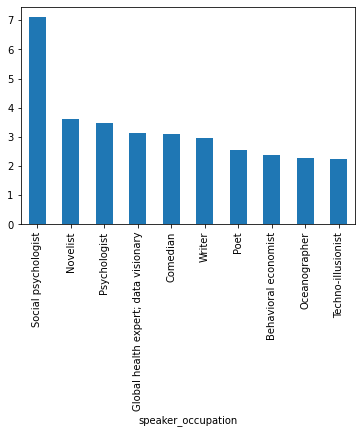

In [98]:

#plotting a sper the mean
ted_pivot_final.mean_views_mn[:10].plot(kind = 'bar')

## Convert the duration column in minutes. Find the details of the longest and the shortest TED Talk

In [99]:
ted['duration'] = ted['duration'].map(lambda x: x/60)

In [100]:
ted['duration']

0       19.400000
1       16.283333
2       21.433333
3       18.600000
4       19.833333
          ...    
2545     7.933333
2546     4.833333
2547    10.850000
2548    18.333333
2549     8.650000
Name: duration, Length: 2550, dtype: float64

In [101]:
longest_talk = max(ted['duration'])

In [102]:
shortest_talk = min(ted['duration'])

In [103]:
print(f"longest talk - {longest_talk} mins \nshortest talk is - {shortest_talk} mins")

longest talk - 87.6 mins 
shortest talk is - 2.25 mins


##### Mean duration of the top 25 viewed TED Talks

In [104]:
ted.pivot_table(index = 'views_mn', values = 'duration', aggfunc = 'mean').reset_index().sort_values('views_mn', ascending = False)[:25]['duration'].mean()

16.101333333333333

## Word cloud for tags

In [105]:
#Convert the string list to an actual list
ted['tags'] = ted['tags'].map(lambda x: x.replace('[', '').replace(']',  '').split(','))

In [106]:
tags_ls = []
for tag in ted['tags'].values:
    tags_ls.extend(tag)

In [107]:
final_words = " ".join(list(set(tags_ls))).replace('\'', '').strip()

In [108]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800,
                     height = 800, background_color='white', min_font_size=12).generate(final_words)

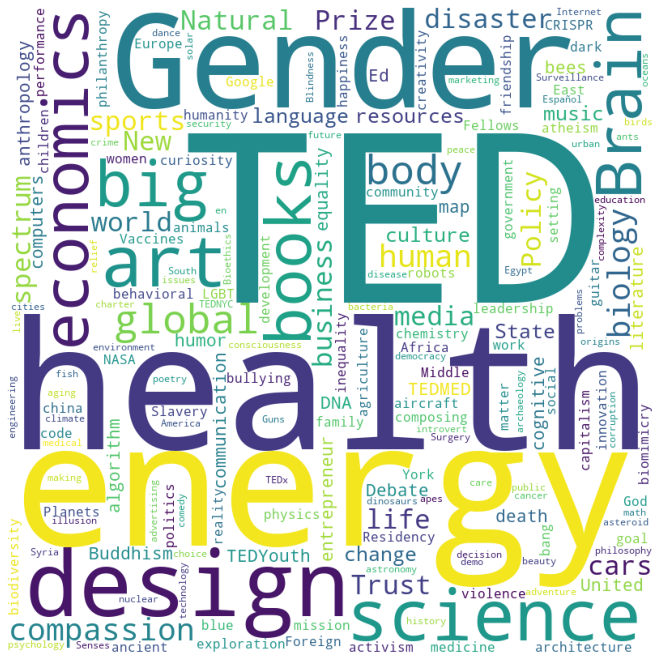

In [109]:
#Plot the wordcloud image
plt.figure(figsize = (9,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()